In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. pandas 라이브러리를 사용해서 csv파일 읽기

In [41]:
train_df = pd.read_csv('./train.csv')

In [42]:
# 리턴형은 DataFrame
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 행, 열 출력

In [54]:
#891행 12열(12차원)
train_df.shape

(891, 12)

## 1.2 유실된 데이터 확인

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [58]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. 데이터 시각화

## 2.1 생존/사망 수를 화면에 출력

In [16]:
# 리턴형은 Series
r = train_df['Survived'].value_counts()
print(type(r))
r

<class 'pandas.core.series.Series'>


0    549
1    342
Name: Survived, dtype: int64

## 2.2 생존/사망 수를 시각화

Figure(864x576)


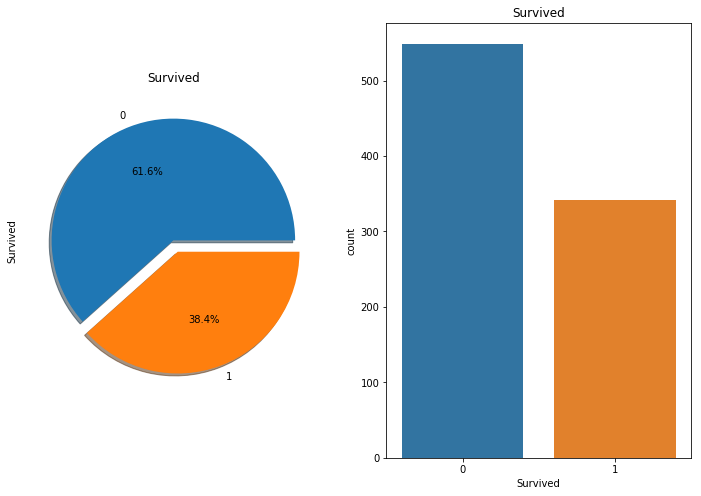

In [39]:
f, ax=plt.subplots(1, 2, figsize=(12,8))
print(f)
print(ax)

# 파이 차트
train_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')

# CountPlot
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

## 2.3 성별로 생존/사망 수를 시각화
※ 데이터 연관관계 분석

남자의 사망률(라벨:0)은 80%가 넘지만, 여자의 사망률은 75%가 넘지 않는다.

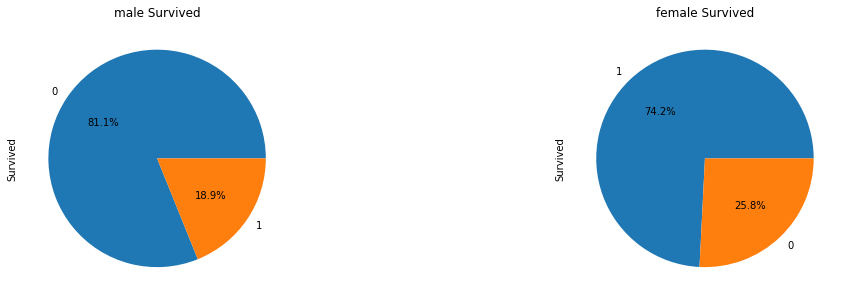

In [51]:
f, ax = plt.subplots(1, 2, figsize=(18,5))
train_df['Survived'][train_df['Sex']=='male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('male Survived')
train_df['Survived'][train_df['Sex']=='female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('female Survived')

plt.show()

## 2.4 시각화 함수 생성

In [99]:
def bar_chart(feature):  
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    
    # f, ax = plt.subplots(1, 2, figsize=(15, 5))
    # survived.plot.pie(explode=[0, 0.1],autopct='%1.1f%%', ax=ax[0])
    #dead.plot.pie(autopct='%1.1f%%', ax=ax[1])
    
    #plt.show()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=True, figsize=(5,5))

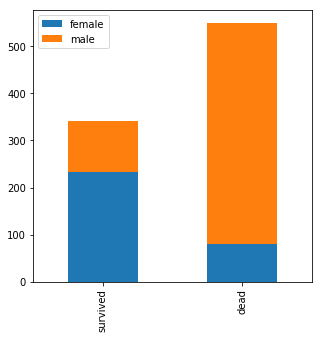

In [101]:
# 성별
# 남자가 여자보다 더 많이 죽음
bar_chart('Sex')

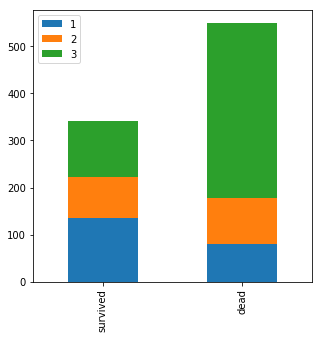

In [103]:
# 티겟 등급
# 티켓 3등급 좌석의 사람이 제일 많이 죽음
bar_chart('Pclass')